# Actividad en clase: Explorando la información


## Cargar los datos
**1. En una nueva libreta, en la plataforma Kaggle, importa los datos de la competencia 'Titanic - Machine Learning from Disaster'. A partit del archivo 'train.csv', crea un marco de datos 'passengers'. Imprime la
cabecera de este marco e inspecciona las columnas.**

In [3]:
#Importamos las librerias necesarias en esta etapa de exploracion
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Se asigna una variable la cual contiene los datos del database obtenido en Kaggle
passengers = pd.read_csv('train.csv')

#Visualizamos los primeros 5 atributos de todas las columnas
print(passengers.head())


#Visualizamos las columnas y el tipo de datos que contienen
print("\n")
print(passengers.info())

ModuleNotFoundError: No module named 'seaborn'

**2. Menciona datos descriptivos de la fuente de información analizada: cantidad de datos, tipo de datos, rangos, y distribucinos observadas. ¿Que variables categóricas encuentras?**

Al analizar los datos se puede observar que se tiene un total de 891 registros de pasajeros, con 12 columnas especificando informacion de cada persona, las columnas son PassengerID, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin y Embarked, en cuanto a los tipos de datos tenemos 5 columnas que consisten de int64, 5 columnas de object y 2 variables float64.

En cuanto al rango de los datos tenemos 5 variables en las que nos podemos enfocar, Age (representando la edad) tiene un rango de 0.42 a 80, Fare (representa la tarifa pagada) tien un rango de 0 a 512.33, Pclass (clase del pasajero) tiene un rango de 1 am 3, Sibsp (representa el numero de hermanos y esposos a bordo) tiene un rango de 0 a 8 y Parch (representa el numero de padres e hijos a bordo) tiene un rango de 0 a 6.

Tenemos 5 variables categoricas, Name (representa el nombre), Sex (representa el sexo), Ticket (representa el numero de ticket), Cabin (representa la cabina en la que dormian los pasajeros, se tienen datos nulos) y Embarked (representa el lugar donde embarco cada pasajero).

**3. Proporciona un justificación para la siguiente respuesta ¿Qué características serías más útiles para predecir la supervivencia de un pasajero?**


Las características más útiles que vamos a considerar es la edad, la clase social y el género. Históricamente, estas variables determinan la prioridad que tienen las personas en poder subir a los botes salvavidas en el caso de que un barco se hunda, esto mejora la probabilidad de supervivencia. Además en el caso de la clase social, esta variable determina la zona donde tenían sus recamaras, una zona más alta incrementa las posibilidades de salir del barco con vida.

## Limpiar los datos



**1. Analiza las variables relevantes que has considerado. ¿Cuales de ellas tienen problemas con información? (Datos faltantes, incorrectos).**

In [3]:
print(passengers.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


**2. Dado el dicho, "las mujeres y los niños primero", el sexo y la edad parecen ser buenas características para predecir la supervivencia. Mapeemos los valores de texto en la columna Sex a un valor numérico. Actualice 'Sex' de modo que todos los valores femeninos se reemplacen con 1 y todos los valores masculinos se reemplacen con 0.**

In [4]:
print(passengers['Sex'].map({'female':1, 'male':0}))

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64


**3. Echemos un vistazo a la edad. Imprima passengers['Age'].values. Puede ver que tenemos varios valores faltantes, o nans. Rellene todos los valores de edad vacíos en pasajeros con la edad media.**

In [5]:
print(passengers['Age'])

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64


**4. Provee una gráfica de barras que permita observar la relación entre sobrevivientes y su género. ¿Observas alguna tendencia?**

In [6]:
#Sobrevivientes
passengers.groupby("Sex")["Survived"].sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

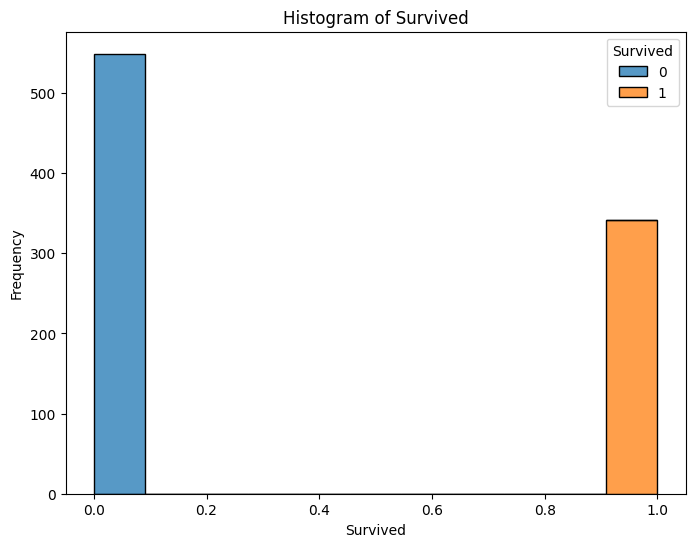

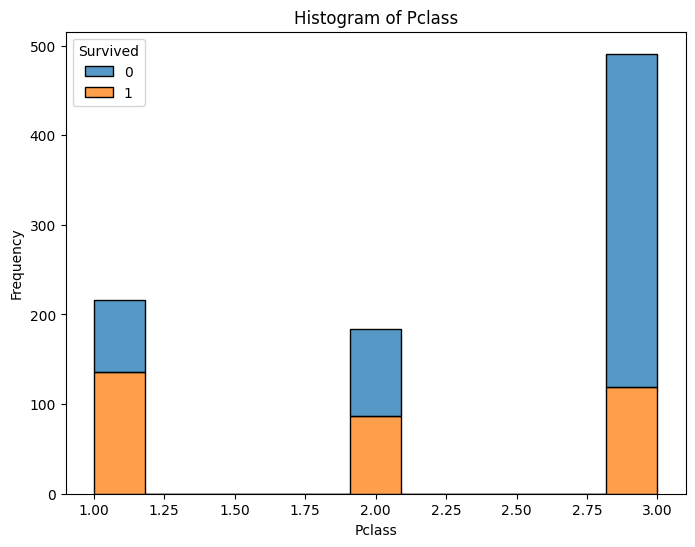

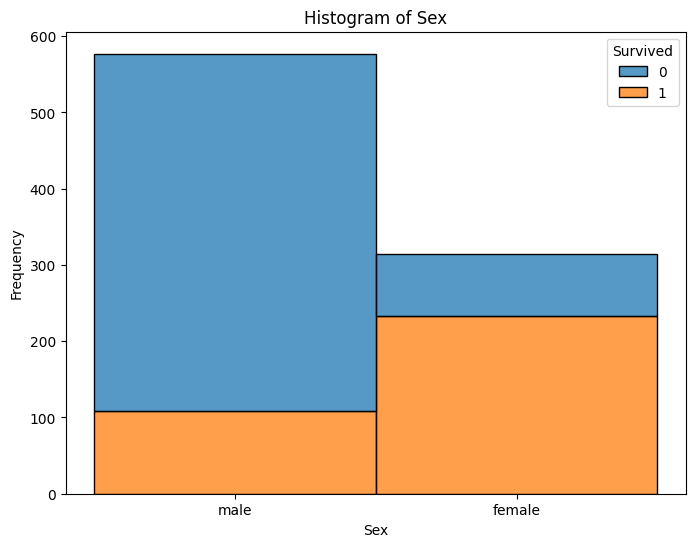

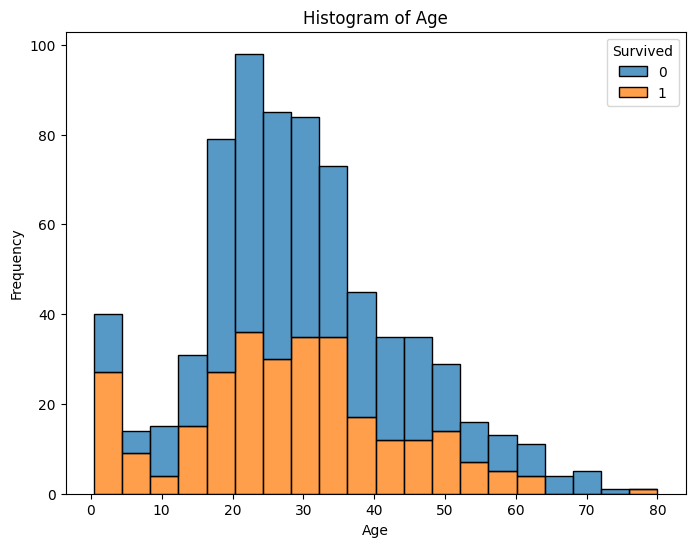

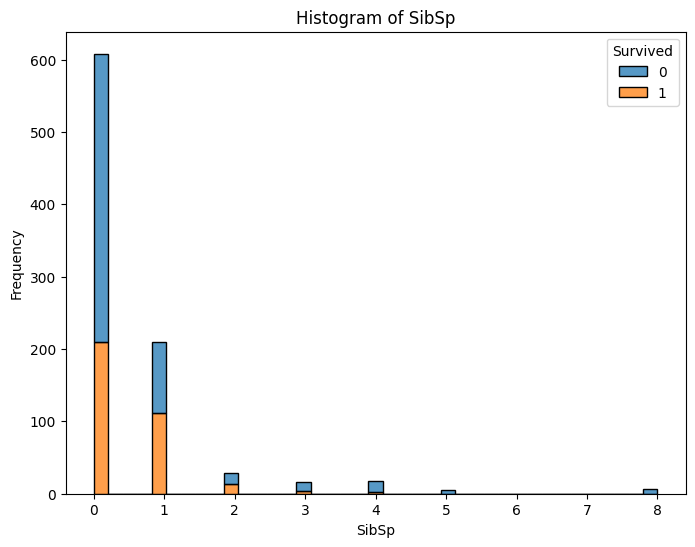

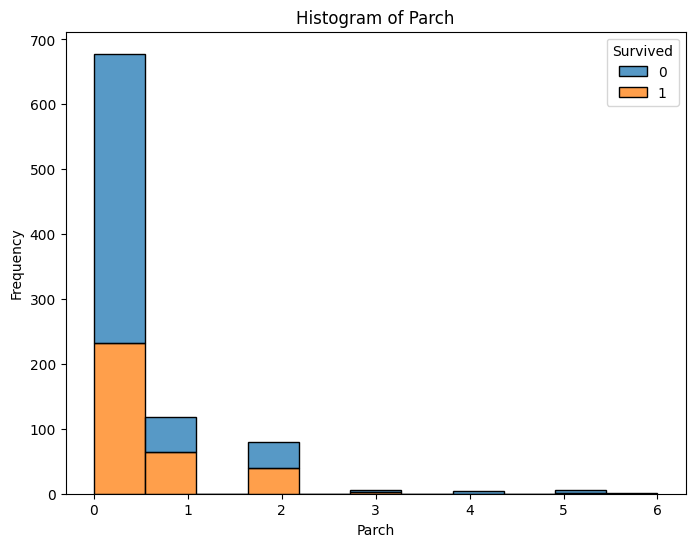

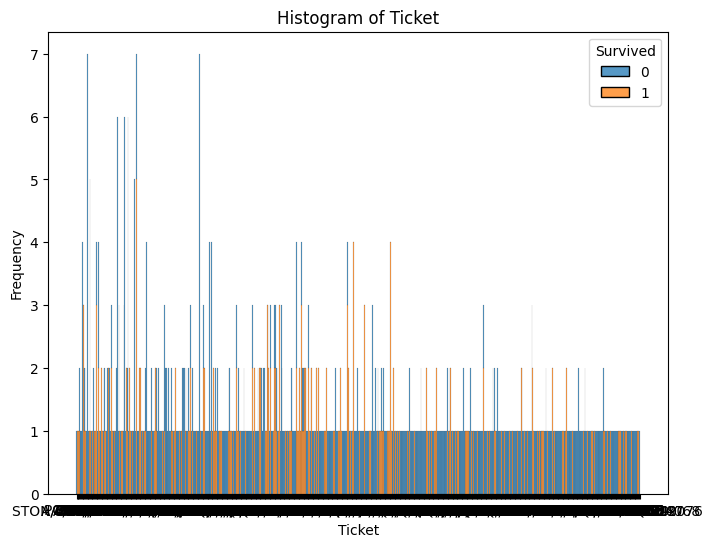

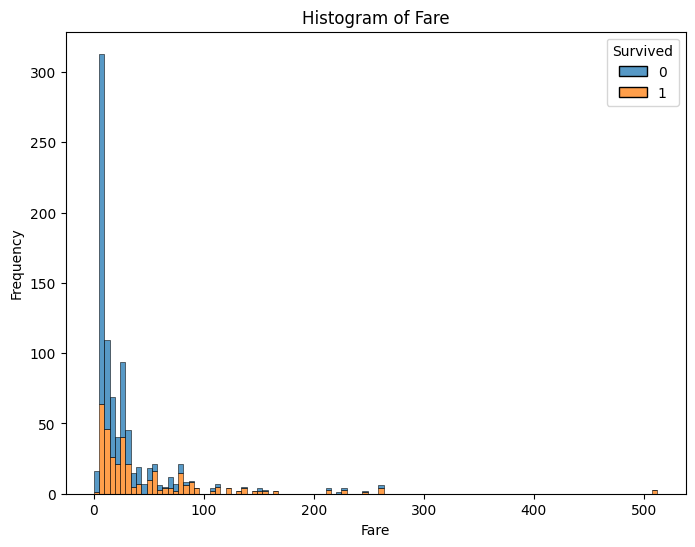

In [7]:
#Creamos histogramas los cuales den una reporesentacion visual de la cantidad de pasajeros que sobrevivieron 
#dependiendo de diferentes variables, esto permitiendonos ver si es que se tiene relacion entre la variable 
#y su probabilidad de sobrevivir
graficas = passengers.drop(columns= ['Cabin', 'Embarked', 'PassengerId', 'Name', 'Ticket', 'Parch', 'SibSp'])
for col in graficas.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(passengers, x = col, hue = 'Survived', multiple='stack' )
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

<Axes: xlabel='Embarked', ylabel='count'>

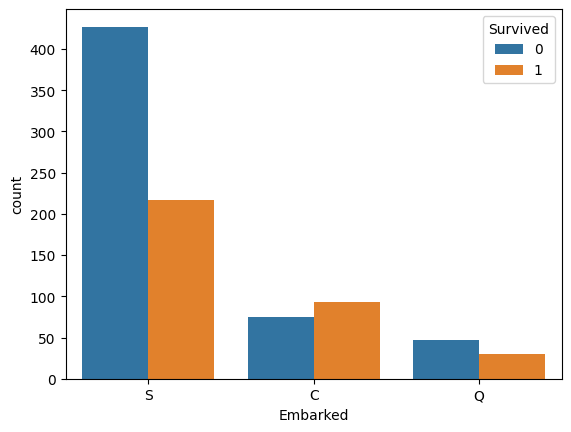

In [8]:
#Creamos una grafica la cual muestra la cantidad de pasajeros que lograron sobrevivir y los que no, 
#separados por la embarcacion por la cual accedieron al Titanic
sns.countplot(x = passengers['Embarked'], hue= passengers['Survived'])

In [ ]:
#Le aplicamos un logaritmo a la variable Fare para normalizar la grafica, esto debido a que contaba con muchos datos
#atipicos e irregulares
passengers['Fare_Log'] = np.log(passengers['Fare']+1)

<Axes: xlabel='Fare_Log', ylabel='Count'>

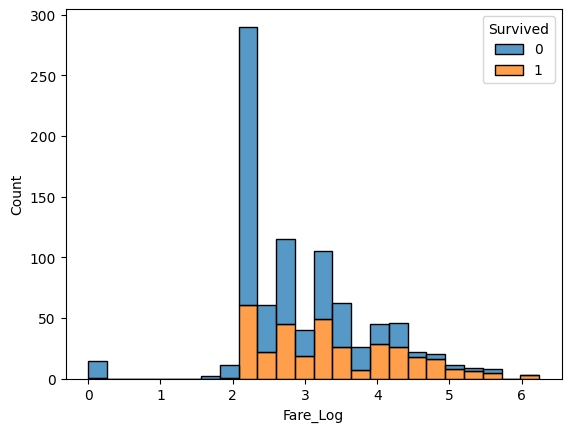

In [ ]:
#Graficamos el histograma de la nueva variable que contiene el Fare con el logaritmo aplicado para 
#poder visualizar los cambios
sns.histplot(passengers, x = 'Fare_Log', hue = 'Survived', multiple = 'stack')

In [11]:
#Creamos una nueva variable llamada Title la cual identifica si se tiene algun titulo en el nombre de las personas
passengers['Title'] = passengers['Name'].str.extract(r',\s*([^\.]+)\.')

#Vemos los primeros 5 elementos de las columnas Name y Title para visualizar la nueva variable
passengers[['Name', 'Title']].head()

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


<Axes: xlabel='Age', ylabel='Count'>

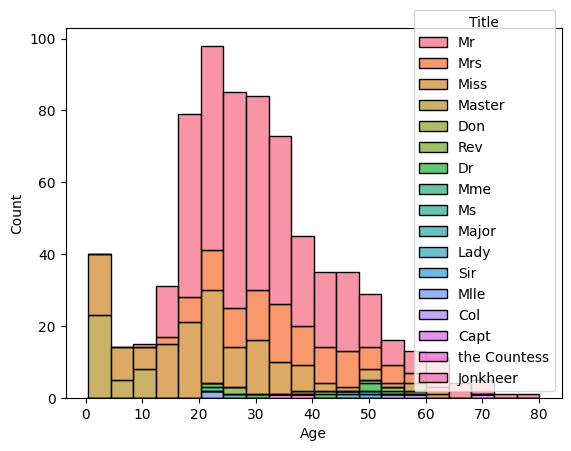

In [12]:
#Graficamos un histograma el cual demuestre el rango de edad de cada titulo, esto para poder generar una prediccion
#de edades para poder hacer una imputacion de datos en los datos faltantes
sns.histplot(data = passengers, x = 'Age', hue = 'Title', multiple= 'stack')

In [13]:
#Hacemos un conteo de la cantidad de personas que tienen cada titulo encontrado
passengers['Title'].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [14]:
#Para la imputacion de datos primero intentaremos encontrar la mediana de la edad para cada titulo se tiene,
#para luego asignarles una edad a las personas que tienen datos nulos en su edad, imputando la mediana 
#del titulo que tenga la persona.

# Calculate the median age for each title
median_age_by_title = passengers.groupby('Title')['Age'].median()

# Fill missing values in the Age column using the median age by title
passengers['Age'] = passengers.apply(lambda row: median_age_by_title[row['Title']] if pd.isnull(row['Age']) else row['Age'], axis=1)

# Check if there are any remaining missing values in the Age column
missing_ages = passengers['Age'].isnull().sum()


<Axes: xlabel='Age', ylabel='Count'>

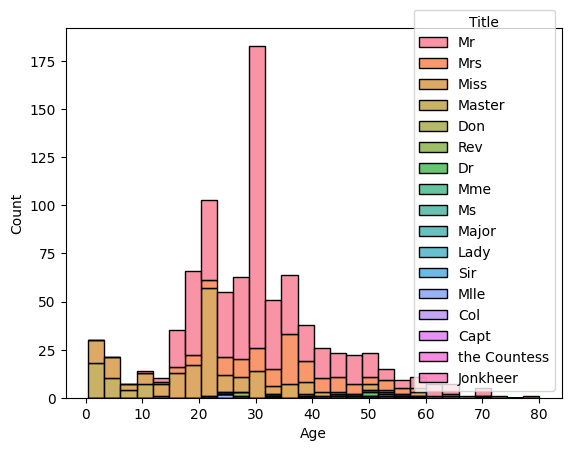

In [15]:
#Graficamos un histograma para visualizar la imputacion de edades dependiendo del titulo
sns.histplot(data = passengers, x = 'Age', hue = 'Title', multiple='stack')

In [ ]:
#Se puede visualizar que la imputacion de datos que intentamos dispara la cantidad de pasajeros en la edad de 30,
#esto se debe a que hay muchos pasajeros que tienen como titulo Mr. pero tambien tienen datos nulos en su edad,
#por lo cual decidimos buscar hacer una imputacion de datos que busque asignar diferentes valores dentro de un rango
#para poder normalizar mas los datos y tener una distribucion mas normal entre los datos

In [4]:
passengers['Family_Size'] = passengers['Parch'] + passengers['SibSp']
passengers['Gender'] = passengers['Sex'].map({'female': 1, 'male': 0})

NameError: name 'passengers' is not defined

In [17]:
corr_data = passengers.drop(columns = ['PassengerId', 'Name','Ticket', 'Cabin', 'Title', 'Parch', 'SibSp', 'Sex'])
corr_data = pd.get_dummies(corr_data)


<Axes: >

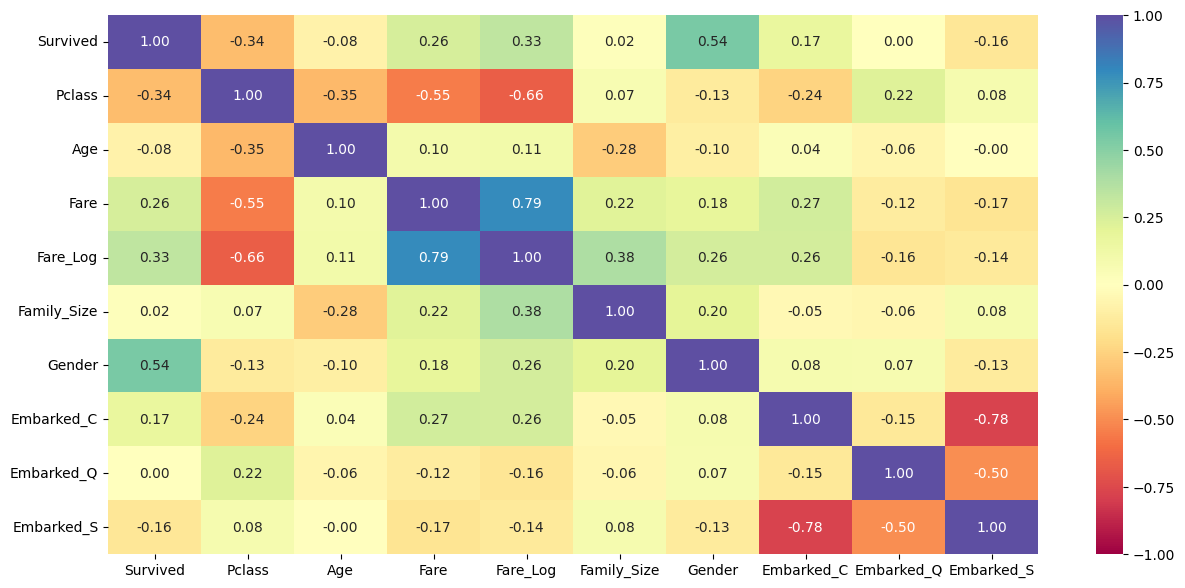

In [18]:
plt.figure(figsize = (15,7))
sns.heatmap(corr_data.corr(), annot = True, vmin = -1, vmax = 1, fmt = ".2f", cmap = "Spectral")

In [19]:
# Armar el primer modelo predictivo

# Crear lista con los hiper-parámetros iniciales (thetas)
theta = [0,0]
theta_nuevo = theta.copy()
# Cargar el valor del learning rate (alpha)
alpha = 0.001

# Crear función lambda para la función de hipótesis
prediccion = lambda b,m,x: 1/(np.exp(-(b + m*x)))

# Calcular el total de muestras a partir de los datos (n)
n = len(passengers)

# Separar datos en grupo de entrenamiento y de prueba
np.random.seed(20)

# Revolver el dataframe
datos_revueltos = passengers.sample(frac=1).reset_index(drop=True)

# Indice para separar los datos
indice = int(n * 0.7)

# Separar en los dos grupos
training = datos_revueltos[:indice].copy()
test = datos_revueltos[indice:].copy()

In [20]:
i = 1
converge1 = 1
converge2 = 1
n = len(training)

# Se entrena el modelo hasta que los valores de theta converjan o hasta que se alcance el limite de iteraciones
while (converge1 > 1e-6 or converge2 > 1e-6) and i < 1000000:
  i = i + 1
  theta_nuevo[0] = theta[0] - alpha*(1/n)*np.sum(prediccion(theta[0], theta[1], training['Gender']) - training['Survived'])
  theta_nuevo[1] = theta[1] - alpha*(1/n)*np.sum((prediccion(theta[0], theta[1], training['Gender']) - training['Survived'])*training['Gender'])
  converge1 = abs(theta_nuevo[0] - theta[0])
  converge2 = abs(theta_nuevo[1] - theta[1])
  theta = theta_nuevo.copy()

print('Iteraciones:', i)
print('theta0 =', round(theta[0], 2))
print('theta1 =', round(theta[1], 2))

Iteraciones: 93593
theta0 = -1.6
theta1 = 1.29


In [21]:
# Se añade una columna para tener las predicciones
test['Prediccion'] = round(prediccion(theta[0], theta[1], test['Gender']))
test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Log,Title,Family_Size,Gender,Prediccion
623,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S,1.979276,Mr,0,0,0.0
624,549,0,3,"Goldsmith, Mr. Frank John",male,33.0,1,1,363291,20.5250,NaN,S,3.069215,Mr,2,0,0.0
625,241,0,3,"Zabour, Miss. Thamine",female,21.0,1,0,2665,14.4542,NaN,C,2.737881,Miss,1,1,1.0
626,376,1,1,"Meyer, Mrs. Edgar Joseph (Leila Saks)",female,35.0,1,0,PC 17604,82.1708,NaN,C,4.420896,Mrs,1,1,1.0
627,449,1,3,"Baclini, Miss. Marie Catherine",female,5.0,2,1,2666,19.2583,NaN,C,3.008565,Miss,3,1,1.0


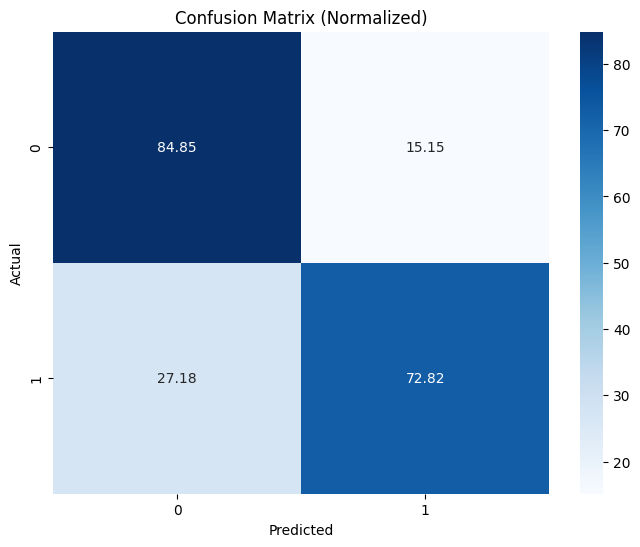

In [22]:
# Matriz de confusion
from sklearn.metrics import confusion_matrix
# Assuming y_true and y_pred are your actual and predicted values
cm = confusion_matrix(test['Survived'], test['Prediccion'])

# Normalize the confusion matrix to get percentages
cm_normalized = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis] * 100

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Normalized)')
plt.show()

In [26]:
test_Titanic = pd.read_csv('test_Titanic.csv')
test_Titanic['Gender'] = test_Titanic['Sex'].map({'female': 1, 'male': 0})
test_Titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [28]:
kaggle_submit = test_Titanic[['PassengerId']].copy()
kaggle_submit['Survived'] = round(prediccion(theta[0], theta[1], test_Titanic['Gender']))
kaggle_submit.head()

,PassengerId,Survived
0,892,0.0
1,893,1.0
2,894,0.0
3,895,0.0
4,896,1.0
